The HuggingFaceTB/SmolLM-1.7B-Instruct model utilizes a tokenizer compatible with the LLaMA architecture. This tokenizer employs a byte pair encoding (BPE) method, which is a subword tokenization technique. BPE starts by treating the input text as a sequence of individual characters and iteratively merges the most frequent adjacent character pairs to form subwords or tokens. This process continues until a predefined number of merges is reached, resulting in a vocabulary that efficiently represents common subword patterns. The advantage of BPE is that it balances the granularity of tokenization, capturing meaningful subword units while keeping the vocabulary size manageable. This approach enhances the model's ability to handle rare or unseen words by decomposing them into known subword components. In the context of the SmolLM-1.7B-Instruct model, the tokenizer is implemented using the Hugging Face Transformers library, which provides tools to load and utilize the tokenizer seamlessly.

# SST test

In [19]:
from datasets import load_dataset

# Load SST-2 dataset
sst2 = load_dataset("glue", "sst2")

# Check the structure of the dataset
print(sst2)

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})


In [20]:
from transformers import AutoTokenizer

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM-1.7B-Instruct")

# Tokenize the dataset and calculate lengths
def calculate_lengths(examples):
    return {"token_length": [len(tokenizer(text)["input_ids"]) for text in examples["sentence"]]}

# Apply token length calculation to the dataset
sst2_with_lengths = sst2.map(calculate_lengths, batched=True)

# Print token lengths for the training set
print(sst2_with_lengths["train"]["token_length"])


[8, 10, 13, 10, 21, 12, 32, 4, 12, 15, 6, 21, 9, 8, 9, 4, 3, 8, 4, 34, 13, 27, 6, 11, 16, 13, 25, 4, 5, 16, 7, 4, 18, 9, 4, 17, 35, 3, 10, 4, 32, 3, 18, 15, 11, 9, 9, 7, 27, 5, 3, 21, 3, 3, 10, 4, 26, 13, 5, 5, 9, 4, 6, 48, 21, 7, 8, 9, 18, 27, 11, 28, 4, 7, 11, 10, 3, 6, 10, 15, 5, 3, 15, 9, 5, 37, 10, 30, 8, 6, 29, 36, 6, 7, 37, 4, 9, 10, 5, 22, 3, 5, 6, 18, 14, 13, 57, 7, 32, 15, 14, 5, 30, 7, 12, 5, 31, 3, 11, 26, 12, 10, 16, 23, 5, 22, 18, 12, 34, 4, 6, 19, 16, 5, 3, 18, 30, 9, 8, 14, 8, 11, 40, 14, 7, 11, 16, 4, 24, 7, 18, 5, 4, 7, 13, 19, 4, 17, 5, 4, 42, 7, 6, 8, 5, 16, 6, 10, 19, 35, 3, 3, 18, 8, 17, 12, 6, 5, 5, 11, 14, 6, 11, 41, 11, 8, 22, 46, 10, 12, 27, 11, 4, 6, 10, 7, 17, 19, 14, 5, 6, 10, 21, 11, 3, 19, 40, 17, 5, 16, 9, 6, 17, 15, 9, 7, 5, 4, 6, 9, 7, 6, 3, 5, 14, 21, 3, 5, 11, 21, 12, 11, 10, 8, 5, 7, 9, 24, 7, 12, 4, 10, 11, 4, 17, 18, 22, 52, 5, 13, 4, 10, 23, 15, 13, 4, 12, 10, 5, 7, 12, 8, 22, 7, 4, 11, 10, 14, 5, 9, 17, 5, 8, 12, 11, 3, 12, 7, 18, 17, 14, 19, 6,

Average token length: 12.54
Max token length: 69
95th percentile: 33.00


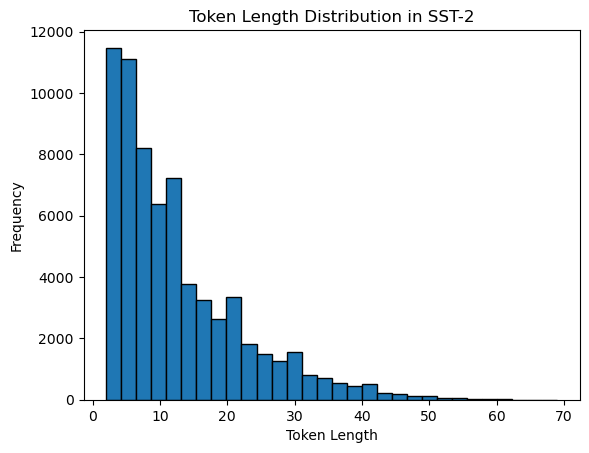

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Get token lengths from the training set
token_lengths = sst2_with_lengths["train"]["token_length"]

# Calculate statistics
print(f"Average token length: {np.mean(token_lengths):.2f}")
print(f"Max token length: {np.max(token_lengths)}")
print(f"95th percentile: {np.percentile(token_lengths, 95):.2f}")

# Plot the distribution
plt.hist(token_lengths, bins=30, edgecolor="black")
plt.title("Token Length Distribution in SST-2")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.show()


# IMDB test

In [22]:
from datasets import load_dataset

# Load SST-2 dataset
imdb = load_dataset("stanfordnlp/imdb")

# Check the structure of the dataset
print(imdb)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


In [23]:
from transformers import AutoTokenizer

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM-1.7B-Instruct")

# Tokenize the dataset and calculate lengths
def calculate_lengths(examples):
    return {"token_length": [len(tokenizer(text)["input_ids"]) for text in examples["text"]]}

# Apply token length calculation to the dataset
imdb_with_lengths = imdb.map(calculate_lengths, batched=True)

# Print token lengths for the training set
print(imdb_with_lengths["train"]["token_length"])


Map: 100%|██████████| 50000/50000 [00:17<00:00, 2840.75 examples/s]

[373, 303, 119, 173, 462, 150, 144, 390, 688, 285, 358, 164, 187, 171, 491, 259, 101, 1205, 91, 232, 270, 231, 278, 450, 144, 257, 317, 136, 308, 497, 190, 199, 185, 298, 519, 154, 188, 362, 281, 144, 157, 168, 1074, 265, 681, 172, 152, 141, 192, 154, 240, 266, 598, 314, 392, 594, 319, 184, 157, 58, 250, 239, 208, 386, 159, 447, 365, 179, 94, 986, 262, 77, 191, 160, 560, 148, 191, 262, 157, 460, 839, 155, 455, 232, 373, 374, 350, 678, 350, 448, 344, 153, 1099, 82, 150, 653, 238, 183, 627, 172, 202, 229, 319, 323, 229, 335, 290, 184, 256, 213, 64, 536, 663, 231, 158, 453, 185, 163, 171, 210, 397, 160, 252, 102, 409, 167, 172, 133, 1058, 410, 402, 156, 306, 140, 194, 90, 367, 303, 239, 66, 190, 301, 821, 236, 236, 158, 150, 611, 173, 517, 228, 170, 201, 245, 235, 333, 205, 243, 217, 210, 93, 214, 271, 376, 205, 497, 193, 392, 392, 224, 159, 257, 340, 321, 151, 137, 119, 168, 424, 289, 1120, 115, 143, 183, 163, 303, 112, 192, 105, 74, 166, 255, 243, 186, 99, 102, 53, 1241, 659, 174, 212, 

Average token length: 307.48
Max token length: 3291
95th percentile: 932.03


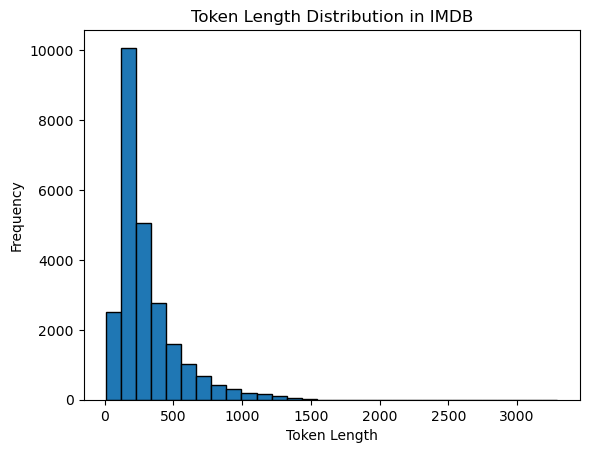

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Get token lengths from the training set
token_lengths = imdb_with_lengths["train"]["token_length"]

# Calculate statistics
print(f"Average token length: {np.mean(token_lengths):.2f}")
print(f"Max token length: {np.max(token_lengths)}")
print(f"95th percentile: {np.percentile(token_lengths, 97):.2f}")

# Plot the distribution
plt.hist(token_lengths, bins=30, edgecolor="black")
plt.title("Token Length Distribution in IMDB")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.show()
